In [1]:
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

from tqdm import tqdm_notebook
from collections import Counter
from glob import glob
from unidecode import unidecode
from nltk.corpus import stopwords
from datetime import datetime

import utils

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
PATH = '../'

PROCESSED_DATA_PATH = os.path.join(PATH, 'data/processed/')

DF_FAKE_PATH = os.path.join(PROCESSED_DATA_PATH, 'df_fake_clean.pkl')
DF_LEGIT_PATH = os.path.join(PROCESSED_DATA_PATH, 'df_legit_clean.pkl')

STOPWORDS = utils.get_stopwords()

CLASS_DICT = {
    0: 'Notícias verdadeiras',
    1: 'Notícias falsas'
}

In [3]:
df_fake = pkl.load(open(DF_FAKE_PATH, 'rb'))

df_legit = pkl.load(open(DF_LEGIT_PATH, 'rb'))

df = pd.concat((df_fake, df_legit), axis=0)

In [4]:
df

,DATE,TEXT,TITLE,FAKE,SOURCE,TEXT_CLEAN,TITLE_CLEAN,TEXT_LEN_CHAR,TEXT_LEN_TOKEN,TITLE_LEN_CHAR,TITLE_LEN_TOKEN,MONTH_YEAR
0,20/09/2019,“bolsonaro demite presidente da caixa e exige ...,\n \t\t\tBolsonaro demite presidente da Caix...,1,boatos.org,bolsonar demit president caix exig result prox...,bolsonar demit president caix apos assessor ga...,256,39,62,10,09/2019
1,25/09/2019,"Todo mundo tinha certeza, inclusive quem era o...",\n \t\t\tMarcos Valério grava áudio falando ...,1,boatos.org,tod mund tinh certeza inclusiv mandante revel ...,marc valeri grav audi fal cas cels daniel edua...,134,22,65,12,09/2019
2,06/10/2019,700 empresas do Japão querem investir no Brasi...,\n \t\t\t700 empresas querem investir no Bra...,1,boatos.org,empres japa quer invest brasil expect govern b...,empres quer invest brasil caus bolsonar boat,354,52,44,7,10/2019
3,07/10/2019,Torre Eiffel vermelha em homenagem ao mais no...,\n \t\t\tTorre Eiffel ficou vermelha em home...,1,boatos.org,torr eiffel vermelh homenag nov cidada honorar...,torr eiffel fic vermelh homenag lul ontem boat,425,69,46,8,10/2019
4,08/10/2019,Atenção! O STF proibiu a circulação do livro d...,\n \t\t\tSTF proíbe venda de livro escrito p...,1,boatos.org,atencao stf proib circul livr janot revel info...,stf proib vend livr escrit rodrig janot boat,265,42,44,8,10/2019
5,12/10/2019,Este homem enganou milhões de brasileiros. Sér...,\n \t\t\tCapa da Veja diz que Sérgio Moro en...,1,boatos.org,hom engan milho brasileiros sergi mor explic p...,cap vej diz sergi mor engan milho brasileir boat,209,31,48,9,10/2019
6,14/10/2019,“A HORA QUE A MÃO DE DEUS PESAR Dizem que essa...,\n \t\t\tLoja de Luciano Huck lança camiseta...,1,boatos.org,hor deus pes diz loj lucian huck cavallera rep...,loj lucian huck lanc camiset satiriz bolsonar ...,148,31,58,9,10/2019
7,14/10/2019,"*EX-SENADOR PELO PT, LINDENBERG FARIAS, É FLAG...",\n \t\t\tLindbergh Farias é flagrado compran...,1,boatos.org,sen pel lindenberg farias flagr compr drog mor...,lindbergh far flagr compr drog morr vidigal ja...,102,17,56,9,10/2019
8,15/10/2019,"“Bom mesmo era o Sarney, que fazia o discurso ...",\n \t\t\tJosé Sarney fez discurso na ONU fal...,1,boatos.org,bom mesm sarney faz discurs onu ingles gent pa...,jos sarney fez discurs onu fal ingles fort sot...,82,15,54,10,10/2019
9,03/10/2019,"“Eu tô do lado do capitão cueca, que foi pego ...",\n \t\t\tDeputado José Guimarães já foi pres...,1,boatos.org,lad capita cueca peg dinheir cueca aqu guimara...,deput jos guimara pres dinheir cuec boat,376,60,40,7,10/2019


In [5]:

def simple_clean_text(text):
    # Making sure we're dealing with strings and lowering the characters
    text = str(text).lower()
    
    # Stripping accents
    text = unidecode(text)
    
    # Removing characters that aren't alphanumeric
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    
    # Removing extra spaces
    text = re.sub('\s+', ' ', text)
    
    # Removing words with length equal or lower than 2 or are in STOPWORDS
    return [token for token in text.split()]

In [6]:
texts = df['TEXT'].apply(simple_clean_text)

In [7]:
cnt = Counter()
for text in tqdm_notebook(texts):
    cnt += Counter(text)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text yticklabel objects>)

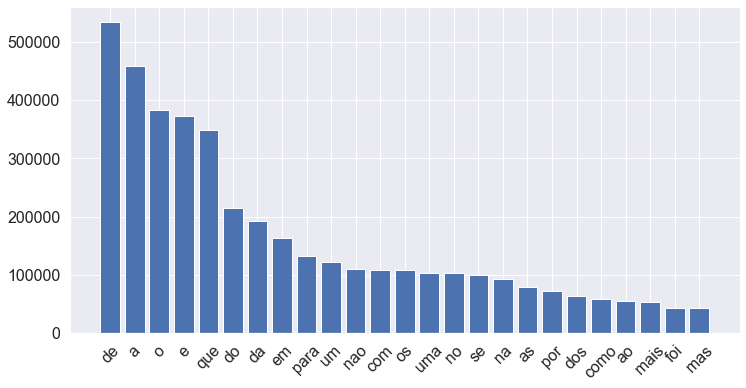

In [8]:
mc = cnt.most_common(25)

x = [c[0] for c in mc]
y = [c[1] for c in mc]

fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation=45, fontsize=16);
plt.yticks(fontsize=16)

In [9]:
# Contagem para cada fonte

Text(2, 944, '894')

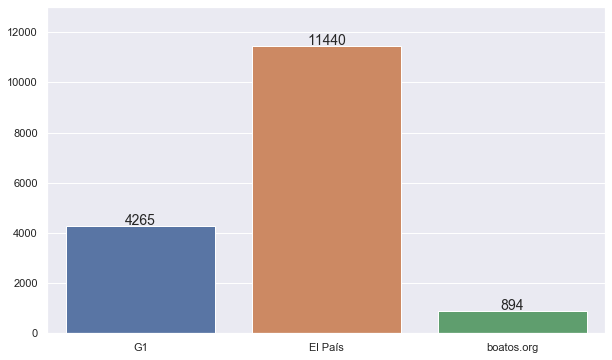

In [10]:
x = ['G1', 'El País', 'boatos.org']
y = [len(df[df['SOURCE'] == x[0]]),
     len(df[df['SOURCE'] == x[1]]),
     len(df[df['SOURCE'] == x[2]])]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x, y)
ax.set_ylim(0, 13000)
ax.text(0, y[0] + 50, y[0], fontsize=14, horizontalalignment="center")
ax.text(1, y[1] + 50, y[1], fontsize=14, horizontalalignment="center")
ax.text(2, y[2] + 50, y[2], fontsize=14, horizontalalignment="center")
# ax.set_title("Quantidade de dados de cada fonte", fontsize=16)

Text(1, 944, '894')

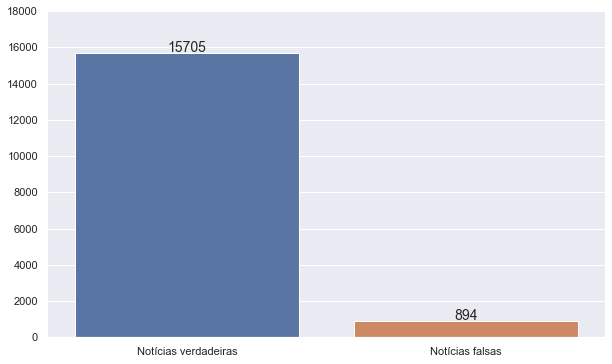

In [11]:
x = ['Notícias verdadeiras', 'Notícias falsas']
y = [len(df[df['FAKE'] == 0]),
     len(df[df['FAKE'] == 1])]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x, y)
ax.set_ylim(0, 18000)
ax.text(0, y[0] + 50, y[0], fontsize=14, horizontalalignment="center")
ax.text(1, y[1] + 50, y[1], fontsize=14, horizontalalignment="center")
# ax.set_title("Quantidade de dados de cada classe", fontsize=16)

In [12]:
print("{:.2f}%".format(min(y) / max(y) * 100))
max(y) / min(y)

5.69%


17.56711409395973

In [13]:
start_date = datetime.strptime('01/2016', '%m/%Y')
end_date = datetime.strptime('01/2019', '%m/%Y')

In [14]:
df[(df['FAKE'] == 1) & (df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) < start_date)].shape

(20, 12)

In [15]:
df[(df['FAKE'] == 1) & (df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) > end_date)].shape

(232, 12)

In [16]:
date_fake = Counter(sorted(df[(df['FAKE'] == 1) &
                              (df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) >= start_date) &
                              (df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) < end_date)]['MONTH_YEAR'], key=lambda x: datetime.strptime(x, '%m/%Y')))

date_true = Counter(sorted(df[(df['FAKE'] == 0) &
                              (df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) >= start_date) &
                              (df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) < end_date)]['MONTH_YEAR'], key=lambda x: datetime.strptime(x, '%m/%Y')))

In [17]:
all_dates = sorted(set(date_fake.keys()).union(set(date_true.keys())), key=lambda x: datetime.strptime(x, '%m/%Y'))

In [18]:
date_fake_final = {}
date_true_final = {}
for date in all_dates:
    if date not in date_fake:
        date_fake_final[date] = 0
    else:
        date_fake_final[date] = date_fake[date]
        
    
    if date not in date_true:
        date_true_final[date] = 0
    else:
        date_true_final[date] = date_true[date]

In [19]:
df_date = pd.DataFrame({
    'date': list(date_fake_final.keys()) + list(date_true_final.keys()),
    'count': list(date_fake_final.values()) + list(date_true_final.values()),
    'Tipo de Notícia': len(date_fake_final) * ['Notícias falsas'] + len(date_true_final) * ['Notícias verdadeiras']
})

In [20]:
df_date

,date,count,Tipo de Notícia
0,01/2016,1,Notícias falsas
1,02/2016,2,Notícias falsas
2,03/2016,34,Notícias falsas
3,04/2016,24,Notícias falsas
4,05/2016,19,Notícias falsas
5,06/2016,13,Notícias falsas
6,07/2016,9,Notícias falsas
7,08/2016,5,Notícias falsas
8,09/2016,19,Notícias falsas
9,10/2016,12,Notícias falsas


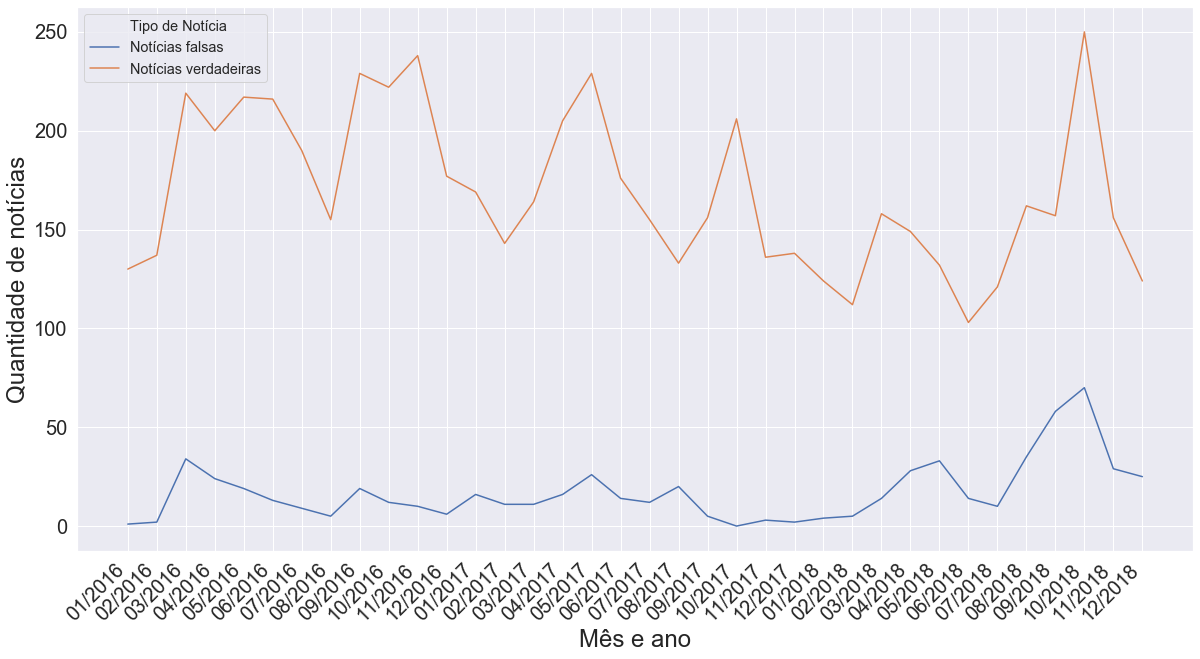

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.lineplot(x='date', y='count', hue='Tipo de Notícia', data=df_date, sort=False)

plt.legend(fontsize='x-large')
ax.set_xlabel('Mês e ano', fontsize=24)
ax.set_ylabel('Quantidade de notícias', fontsize=24)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_fontsize(20)
    tick.set_ha('right')
    

    
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)

In [22]:
df = df[(df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) >= start_date) &
        (df['MONTH_YEAR'].apply(lambda x: datetime.strptime(x, '%m/%Y')) < end_date)].reset_index(drop=True)



Text(1, 665, '615')

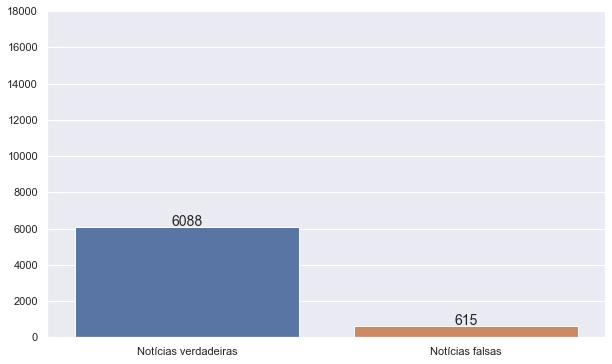

In [23]:
x = ['Notícias verdadeiras', 'Notícias falsas']
y = [len(df[df['FAKE'] == 0]),
     len(df[df['FAKE'] == 1])]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x, y)
ax.set_ylim(0, 18000)
ax.text(0, y[0] + 50, y[0], fontsize=14, horizontalalignment="center")
ax.text(1, y[1] + 50, y[1], fontsize=14, horizontalalignment="center")
# ax.set_title("Quantidade de dados de cada classe", fontsize=16)

In [24]:

def simple_clean_text(text):
    # Making sure we're dealing with strings and lowering the characters
    text = str(text).lower()
    
    # Stripping accents
    text = unidecode(text)
    
    # Removing characters that aren't alphanumeric
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)
    
    # Removing tokens that intercalate between letters and digits
    text = re.sub(r'\w*([a-zA-Z][0-9]|[0-9][a-zA-Z])\w*', ' ', text)
    
    # Removing digits
    text = re.sub(r'\d', ' ', text)
    
    # Removing tokens with letters that appear more than twice in a row
    text = re.sub(r'\w*([a-zA-Z])\1{2,}\w*', ' ', text)
    
    # Removing extra spaces
    text = re.sub('\s+', ' ', text)
    
    # Removing words with length equal or lower than 2 or are in STOPWORDS
    return ' '.join([token for token in text.split() if len(token) > 2 and token not in STOPWORDS])

In [25]:
# def simple_clean_text(text):
#     # Making sure we're dealing with strings and lowering the characters
#     text = str(text).lower()
    
#     # Stripping accents
#     text = unidecode(text)
    
#     # Removing characters that aren't alphanumeric
#     text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)
    
#     # Removing extra spaces
#     text = re.sub('\s+', ' ', text)
    
#     # Removing words with length equal or lower than 2 or are in STOPWORDS
#     return ' '.join([token for token in text.split() if len(token) > 2 and token not in STOPWORDS])

In [26]:
df['SIMPLE_CLEAN_TEXT'] = df['TEXT'].apply(simple_clean_text)

In [27]:
all_cnt = {}
for key in tqdm_notebook(CLASS_DICT):
    cnt = Counter()
    for text in tqdm_notebook(df[df['FAKE'] == key]['SIMPLE_CLEAN_TEXT']):
        cnt += Counter(str(text).split())

    all_cnt[key] = cnt.most_common()

In [28]:
all_cnt

{0: [('presidente', 14240),
  ('governo', 11832),
  ('pais', 11078),
  ('anos', 10438),
  ('sobre', 9590),
  ('contra', 8366),
  ('ainda', 7888),
  ('politica', 7602),
  ('brasil', 7371),
  ('segundo', 7055),
  ('trump', 6561),
  ('partido', 6512),
  ('pode', 6361),
  ('feira', 6130),
  ('pessoas', 5945),
  ('disse', 5837),
  ('estado', 5762),
  ('porque', 5730),
  ('agora', 5612),
  ('dois', 5525),
  ('ano', 5507),
  ('lula', 5473),
  ('todos', 5090),
  ('temer', 5030),
  ('caso', 4955),
  ('parte', 4751),
  ('dia', 4681),
  ('desde', 4637),
  ('diz', 4573),
  ('eleicoes', 4512),
  ('durante', 4493),
  ('campanha', 4417),
  ('vez', 4413),
  ('primeiro', 4359),
  ('poder', 4257),
  ('bolsonaro', 4239),
  ('federal', 4214),
  ('onde', 4204),
  ('outros', 4157),
  ('fazer', 4107),
  ('politico', 4095),
  ('ministro', 4069),
  ('nacional', 4056),
  ('processo', 3999),
  ('antes', 3997),
  ('menos', 3987),
  ('grande', 3952),
  ('candidato', 3927),
  ('hoje', 3881),
  ('apenas', 3849),
  (

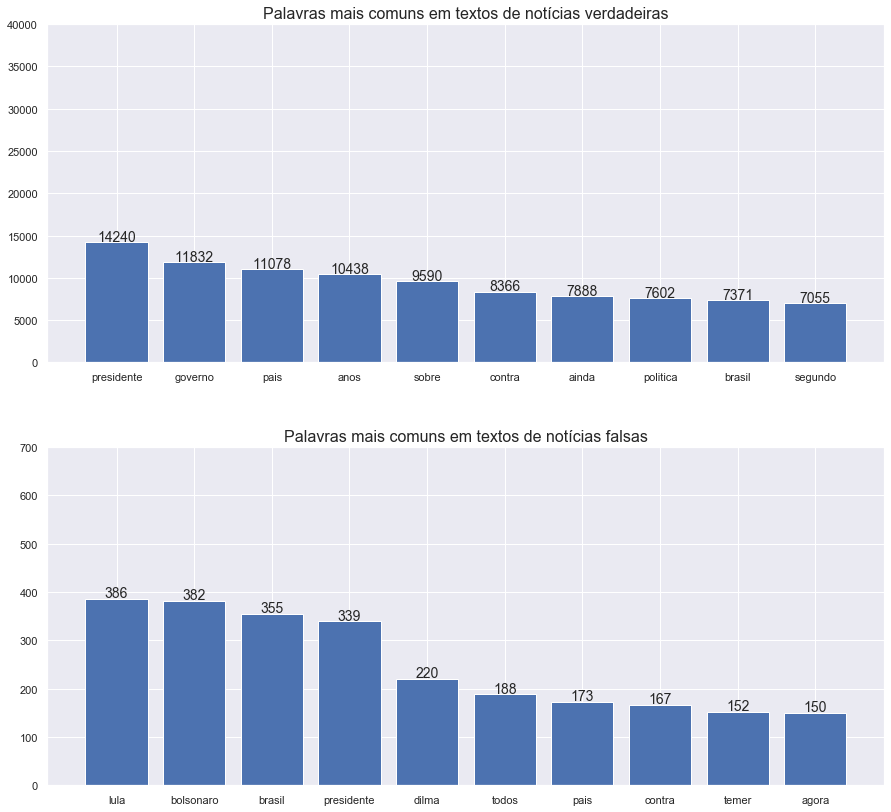

In [29]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 14))

n_most_common = 10

ax[0].bar([plv[0] for plv in all_cnt[0][:n_most_common]], [plv[1] for plv in all_cnt[0][:n_most_common]])
ax[0].set_title('Palavras mais comuns em textos de notícias verdadeiras', fontdict={'size': 16})
ax[0].set_ylim(0, 40000)

ax[1].bar([plv[0] for plv in all_cnt[1][:n_most_common]], [plv[1] for plv in all_cnt[1][:n_most_common]])
ax[1].set_title('Palavras mais comuns em textos de notícias falsas', fontdict={'size': 16})
ax[1].set_ylim(0, 700)

plt.subplots_adjust(hspace=0.25)

for i in range(2):
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(0)
    padd = [plv[1] for plv in all_cnt[i][:n_most_common]][0] * 0.01
    for j in range(n_most_common):
        ax[i].text(j, all_cnt[i][j][1] + padd, all_cnt[i][j][1], fontsize=14, horizontalalignment="center")


[Text(0, 0, 'Verdadeira'), Text(0, 0, 'Falsa')]

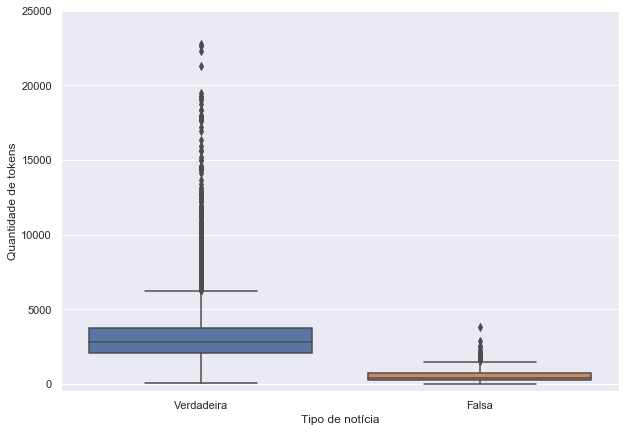

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim(-500, 25000)
# ax.set_title("Distribuição dos documentos com relação à quantidade de tokens", fontdict={'size': 16})
ax = sns.boxplot(x='FAKE', y='TEXT_LEN_CHAR', data=df)
ax.set_ylabel("Quantidade de tokens")
ax.set_xlabel("Tipo de notícia")
ax.set_xticklabels(["Verdadeira", "Falsa"])

In [31]:
df[df['FAKE'] == 1].shape

(615, 13)

In [32]:
df_calc = df[df['FAKE'] == 1].append(df[(df['FAKE'] == 0) & (df['TEXT_LEN_TOKEN'] > 20)].sort_values('TEXT_LEN_TOKEN').reset_index(drop=True)[:len(df[df['FAKE'] == 1])]).reset_index(drop=True)

In [33]:
df_calc

,DATE,TEXT,TITLE,FAKE,SOURCE,TEXT_CLEAN,TITLE_CLEAN,TEXT_LEN_CHAR,TEXT_LEN_TOKEN,TITLE_LEN_CHAR,TITLE_LEN_TOKEN,MONTH_YEAR,SIMPLE_CLEAN_TEXT
0,10/12/2018,"BOLSONARO Passou o Coaf Pro Moro , serão demit...",\n \t\t\tMoro vai demitir 180 petistas que g...,1,boatos.org,bolsonar pass coaf pro mor demit petist salari...,mor vai demit petist ganh mil coaf boat,242,38,39,8,12/2018,bolsonaro passou coaf pro moro demitidos petis...
1,08/12/2018,Te segura aí. Trump tem 267 Bilhões pra Negoci...,\n \t\t\tTrump quer investir R$ 1 trilhão no...,1,boatos.org,segur trump bilho pra negoc govern bolsonar im...,trump quer invest trilha brasil caus bolsonar ...,190,31,50,8,12/2018,segura trump bilhoes negociar governo bolsonar...
2,09/12/2018,6 anos vendendo Avon. Chupa Natura!! Lula diz ...,\n \t\t\tLula disse que dona Marisa ganhou R...,1,boatos.org,anos vend avon chup natura lul diz milho inven...,lul diss don maris ganh milho vend avon boat,225,41,44,9,12/2018,anos vendendo avon chupa natura lula diz milho...
3,12/12/2018,"“Arma com número de série raspada, filiado ao...","\n \t\t\tAtirador de Campinas, Euler Fernand...",1,boatos.org,arm numer seri raspada fili atir indiscrimin l...,atir campinas eul fern grandolpho fili boat,134,20,43,7,12/2018,arma numero serie raspada filiado atirando ind...
4,13/12/2018,Gilmar mendes fica de costas propositadamente...,\n \t\t\tGilmar Mendes vira de costas na hor...,1,boatos.org,gilm mend fic cost proposit plen execu hin nac...,gilm mend vir cost hor hin nacional mostr vid ...,330,50,50,10,12/2018,gilmar mendes fica costas propositadamente ple...
5,13/12/2018,"*INDULTO DISFARÇADO PARA SOLTAR LULA, O MAIOR ...",\n \t\t\tIndulto de Natal de Temer foi edita...,1,boatos.org,indult disfarc par solt lula maior ladra histo...,indult natal edit par tir lul cad boat,581,96,38,8,12/2018,indulto disfarcado soltar lula maior ladrao hi...
6,21/12/2018,"INSS cancela benefício de 400 mil pessoas, ido...",\n \t\t\tIdosa chora ao tentar sacar BPC-Loa...,1,boatos.org,inss cancel benefici mil pessoas idos chor fil...,idos chor tent sac bpc cancel pel inss mostr f...,838,130,53,11,12/2018,inss cancela beneficio mil pessoas idosa chora...
7,20/12/2018,Ministrão Marco Aurélio e satanás Fidel dono d...,\n \t\t\tMinistro Marco Aurélio Mello aparec...,1,boatos.org,ministra marc aureli satanas fidel don cubanos...,ministr marc aureli mell aparec fot fidel cast...,523,80,52,9,12/2018,ministrao marco aurelio satanas fidel dono cub...
8,16/12/2018,Aí está a resposta do porque que 200 “médicos”...,\n \t\t\tPrimeiros 200 médicos cubanos que f...,1,boatos.org,respost porqu medicos sair dia par outro brasi...,primeir medic cuban embor polic cuban boat,105,18,42,7,12/2018,resposta porque medicos sairam dia outro brasi...
9,19/12/2018,O que estava sendo implantado no Brasil é o qu...,"\n \t\t\tProjeto Aster, de Dilma e Putin, tr...",1,boatos.org,estav send implant brasil comec ser implant ve...,projet aster dilm putin trar exercit russ ufa ...,354,59,57,10,12/2018,sendo implantado brasil comecou implantado ven...


In [34]:
all_cnt = {}
for key in tqdm_notebook(CLASS_DICT):
    cnt = Counter()
    for text in tqdm_notebook(df_calc[df_calc['FAKE'] == key]['SIMPLE_CLEAN_TEXT']):
        cnt += Counter(str(text).split())

    all_cnt[key] = cnt.most_common()

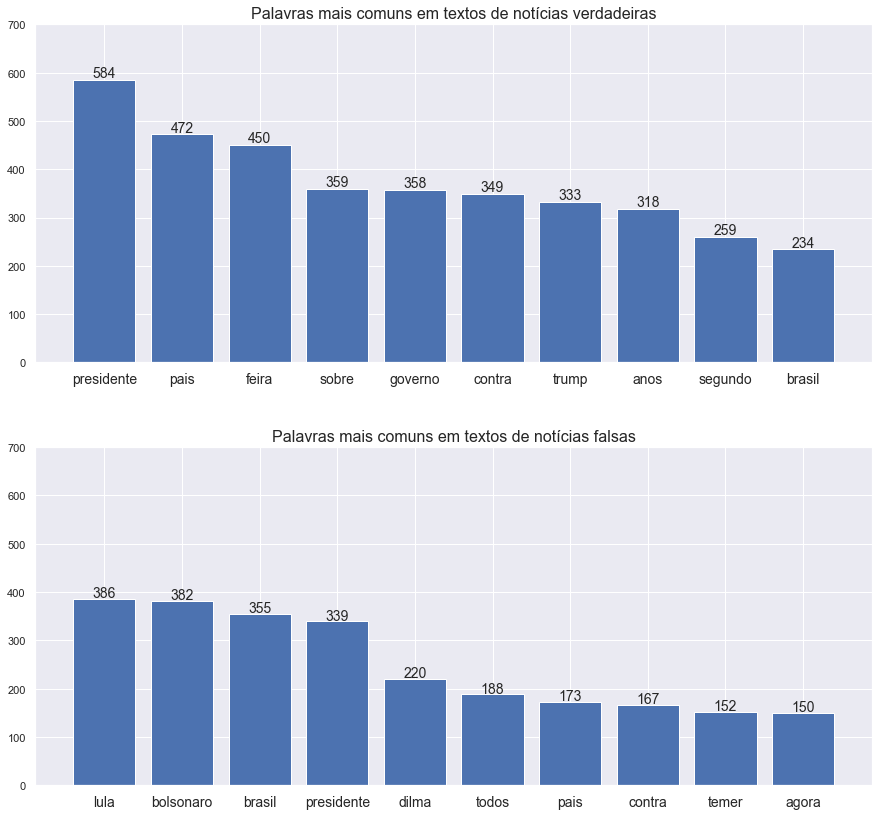

In [35]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 14))

n_most_common = 10

ax[0].bar([plv[0] for plv in all_cnt[0][:n_most_common]], [plv[1] for plv in all_cnt[0][:n_most_common]])
ax[0].set_title('Palavras mais comuns em textos de notícias verdadeiras', fontdict={'size': 16})
ax[0].set_ylim(0, 700)

ax[1].bar([plv[0] for plv in all_cnt[1][:n_most_common]], [plv[1] for plv in all_cnt[1][:n_most_common]])
ax[1].set_title('Palavras mais comuns em textos de notícias falsas', fontdict={'size': 16})
ax[1].set_ylim(0, 700)

plt.subplots_adjust(hspace=0.25)

for i in range(2):
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(0)
        tick.set_fontsize(14)
    padd = [plv[1] for plv in all_cnt[i][:n_most_common]][0] * 0.01
    for j in range(n_most_common):
        ax[i].text(j, all_cnt[i][j][1] + padd, all_cnt[i][j][1], fontsize=14, horizontalalignment="center")


[Text(0, 0, 'Verdadeira'), Text(0, 0, 'Falsa')]

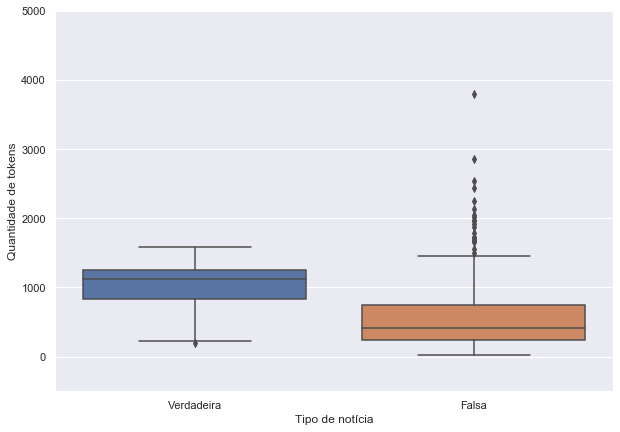

In [36]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim(-500, 5000)
# ax.set_title("Distribuição dos documentos com relação à quantidade de tokens", fontdict={'size': 16})
ax = sns.boxplot(x='FAKE', y='TEXT_LEN_CHAR', data=df_calc)
ax.set_ylabel("Quantidade de tokens")
ax.set_xlabel("Tipo de notícia")
ax.set_xticklabels(["Verdadeira", "Falsa"])

In [47]:
with open(PROCESSED_DATA_PATH + 'df_prime_truncated.pkl', 'wb') as f:
    pkl.dump(df_calc, f)

In [34]:
from imblearn.under_sampling import RandomUnderSampler

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.calibration import CalibratedClassifierCV

from sklearn.pipeline import Pipeline

In [35]:
df_calc

,DATE,TEXT,TITLE,FAKE,SOURCE,TEXT_CLEAN,TITLE_CLEAN,TEXT_LEN_CHAR,TEXT_LEN_TOKEN,TITLE_LEN_CHAR,TITLE_LEN_TOKEN,MONTH_YEAR,SIMPLE_CLEAN_TEXT
0,10/12/2018,"BOLSONARO Passou o Coaf Pro Moro , serão demit...",\n \t\t\tMoro vai demitir 180 petistas que g...,1,boatos.org,bolsonar pass coaf pro mor demit petist salari...,mor vai demit petist ganh mil coaf boat,242,38,39,8,12/2018,bolsonaro passou coaf pro moro demitidos petis...
1,08/12/2018,Te segura aí. Trump tem 267 Bilhões pra Negoci...,\n \t\t\tTrump quer investir R$ 1 trilhão no...,1,boatos.org,segur trump bilho pra negoc govern bolsonar im...,trump quer invest trilha brasil caus bolsonar ...,190,31,50,8,12/2018,segura trump bilhoes negociar governo bolsonar...
2,09/12/2018,6 anos vendendo Avon. Chupa Natura!! Lula diz ...,\n \t\t\tLula disse que dona Marisa ganhou R...,1,boatos.org,anos vend avon chup natura lul diz milho inven...,lul diss don maris ganh milho vend avon boat,225,41,44,9,12/2018,anos vendendo avon chupa natura lula diz milho...
3,12/12/2018,"“Arma com número de série raspada, filiado ao...","\n \t\t\tAtirador de Campinas, Euler Fernand...",1,boatos.org,arm numer seri raspada fili atir indiscrimin l...,atir campinas eul fern grandolpho fili boat,134,20,43,7,12/2018,arma numero serie raspada filiado atirando ind...
4,13/12/2018,Gilmar mendes fica de costas propositadamente...,\n \t\t\tGilmar Mendes vira de costas na hor...,1,boatos.org,gilm mend fic cost proposit plen execu hin nac...,gilm mend vir cost hor hin nacional mostr vid ...,330,50,50,10,12/2018,gilmar mendes fica costas propositadamente ple...
5,13/12/2018,"*INDULTO DISFARÇADO PARA SOLTAR LULA, O MAIOR ...",\n \t\t\tIndulto de Natal de Temer foi edita...,1,boatos.org,indult disfarc par solt lula maior ladra histo...,indult natal edit par tir lul cad boat,581,96,38,8,12/2018,indulto disfarcado soltar lula maior ladrao hi...
6,21/12/2018,"INSS cancela benefício de 400 mil pessoas, ido...",\n \t\t\tIdosa chora ao tentar sacar BPC-Loa...,1,boatos.org,inss cancel benefici mil pessoas idos chor fil...,idos chor tent sac bpc cancel pel inss mostr f...,838,130,53,11,12/2018,inss cancela beneficio mil pessoas idosa chora...
7,20/12/2018,Ministrão Marco Aurélio e satanás Fidel dono d...,\n \t\t\tMinistro Marco Aurélio Mello aparec...,1,boatos.org,ministra marc aureli satanas fidel don cubanos...,ministr marc aureli mell aparec fot fidel cast...,523,80,52,9,12/2018,ministrao marco aurelio satanas fidel dono cub...
8,16/12/2018,Aí está a resposta do porque que 200 “médicos”...,\n \t\t\tPrimeiros 200 médicos cubanos que f...,1,boatos.org,respost porqu medicos sair dia par outro brasi...,primeir medic cuban embor polic cuban boat,105,18,42,7,12/2018,resposta porque medicos sairam dia outro brasi...
9,19/12/2018,O que estava sendo implantado no Brasil é o qu...,"\n \t\t\tProjeto Aster, de Dilma e Putin, tr...",1,boatos.org,estav send implant brasil comec ser implant ve...,projet aster dilm putin trar exercit russ ufa ...,354,59,57,10,12/2018,sendo implantado brasil comecou implantado ven...


In [36]:
pipe = Pipeline(
    [('vect', TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.9)),
     ('clf', CalibratedClassifierCV(LinearSVC()))]
)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_calc['TEXT_CLEAN'], df_calc['FAKE'])

In [38]:
pipe.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=5, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0,
                                                                 class_weigh

In [39]:
y_pred = pipe.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.92      0.96      0.94       146

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308



In [41]:
y_pred = pipe.predict(df['TEXT_CLEAN'])

In [42]:
print(classification_report(df['FAKE'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      6088
           1       0.75      0.99      0.85       615

    accuracy                           0.97      6703
   macro avg       0.87      0.98      0.92      6703
weighted avg       0.98      0.97      0.97      6703



In [43]:
print(confusion_matrix(df['FAKE'], y_pred))

[[5881  207]
 [   6  609]]


In [44]:
data = {'TEXT': [], 'FAKE': []}

for i, item in enumerate(tqdm_notebook(sorted(glob('../data/processed/corpus_usp/size_normalized_texts/fake/*'), key=lambda x: int(re.findall('\d+', x)[0])))):
    
    if '../data/processed/corpus_usp/full_texts/fake-meta-information\\{}-meta.txt'.format(i + 1) not in glob('../data/processed/corpus_usp/full_texts/fake-meta-information/*'):
        continue
    
    with open('../data/processed/corpus_usp/full_texts/fake-meta-information/{}-meta.txt'.format(i + 1), 'r', encoding="utf8") as f:
        if f.read().split('\n')[2] != 'politica':
            continue

    with open(item, 'r', encoding="utf8") as f:
        data['TEXT'].append(f.read())
        data['FAKE'].append(1)

In [45]:

for i, item in enumerate(tqdm_notebook(sorted(glob('../data/processed/corpus_usp/size_normalized_texts/true/*'), key=lambda x: int(re.findall('\d+', x)[0])))):
    
    if '../data/processed/corpus_usp/full_texts/true-meta-information\\{}-meta.txt'.format(i + 1) not in glob('../data/processed/corpus_usp/full_texts/true-meta-information/*'):
        continue
    
    with open('../data/processed/corpus_usp/full_texts/true-meta-information/{}-meta.txt'.format(i + 1), 'r', encoding="utf8") as f:
        if f.read().split('\n')[2] != 'politica':
            continue

    with open(item, 'r', encoding="utf8") as f:
        data['TEXT'].append(f.read())
        data['FAKE'].append(0)

In [46]:
df = pd.DataFrame(data)

In [47]:

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from unidecode import unidecode

STOPWORDS = set(unidecode(sw) for sw in stopwords.words('portuguese'))

In [48]:
stemmer = SnowballStemmer(language='portuguese')

def clean_text(text):
    # Making sure we're dealing with strings and lowering the characters
    text = str(text).lower()
    
    # Stemming tokens
    text = " ".join([stemmer.stem(wrd) for wrd in text.split()])
    
    # Stripping accents
    text = unidecode(text)
    
    # Removing characters that aren't alphanumeric
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)
    
    # Removing tokens that intercalate between letters and digits
    text = re.sub(r'\w*([a-zA-Z][0-9]|[0-9][a-zA-Z])\w*', ' ', text)
    
    # Removing digits
    text = re.sub(r'\d', ' ', text)
    
    # Removing tokens with letters that appear more than twice in a row
    text = re.sub(r'\w*([a-zA-Z])\1{2,}\w*', ' ', text)
    
    # Removing extra spaces
    text = re.sub('\s+', ' ', text)
    
    # Removing words with length equal or lower than 2 or are in STOPWORDS
    return ' '.join([token for token in text.split() if len(token) > 2 and token not in STOPWORDS])

In [49]:
for i, row in tqdm_notebook(df.iterrows(), total=len(df)):
    df.loc[i, 'CLEAN_TEXT'] = clean_text(row['TEXT'])

In [50]:
y_pred = pipe.predict(df['CLEAN_TEXT'])

In [51]:
print(classification_report(df['FAKE'], y_pred))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71      2089
           1       0.70      0.82      0.75      2089

    accuracy                           0.73      4178
   macro avg       0.74      0.73      0.73      4178
weighted avg       0.74      0.73      0.73      4178



In [52]:
print(confusion_matrix(df['FAKE'], y_pred))

[[1358  731]
 [ 384 1705]]


In [53]:
y_pred_proba = pipe.predict_proba(df['CLEAN_TEXT'])

In [54]:
y_test_wproba = []
y_pred_wproba = []
threshold = 0.99

for i, item in enumerate(y_pred):
    if y_pred_proba[i].max() > threshold:
        y_test_wproba.append(df['FAKE'][i])
        y_pred_wproba.append(y_pred[i])


In [55]:
print(classification_report(y_test_wproba, y_pred_wproba))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.98      0.99      0.99       171

    accuracy                           0.98       245
   macro avg       0.98      0.97      0.98       245
weighted avg       0.98      0.98      0.98       245



In [56]:
len(y_pred_wproba) / len(y_pred)

0.058640497845859264

NameError: name 'x_step' is not defined

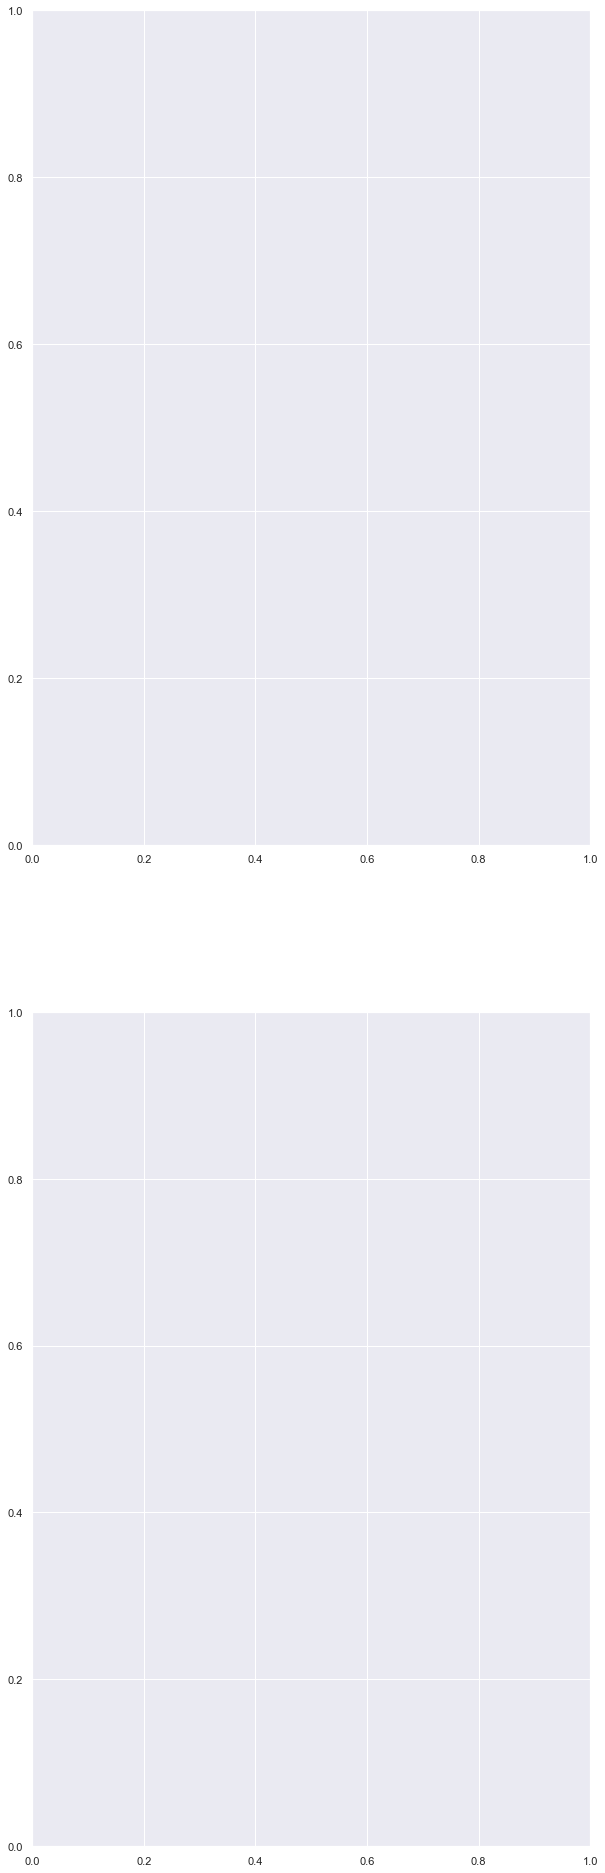

In [61]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 20))
# fig.subplots_adjust(top=1.4)
# for i, cls in enumerate(CLASS_DICT):
# #     n_bins = 2 * len(set(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'].apply(lambda x: round(x / 100) * 100)))
# #     n_bins = 50
# #     x_min = math.floor(min(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
# #     x_max = math.ceil(max(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
#     x_min = 0
#     x_max = 500
# #     x_step = int(math.pow(10, math.ceil(math.log(math.floor((x_max - x_min) / 100), 10))))
#     print(x_step)
# #     ax[i].set(xlim=(x_min, x_max))
# #     ax[i].hist(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'], bins=n_bins, align='mid')
#     ax[i].hist(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'], align='mid')
# #     ax[i].set_xticklabels(range(x_min, x_max, x_step), rotation=90)
    
#     ax[i].set_title('Tamanho do Corpus - {}'.format(cls))
#     ax[i].set_xlabel('Número de tokens (por documento)');
#     ax[i].set_ylabel('Número total de documentos');